In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, TargetEncoder


# To avoid truncating the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load data

In [2]:
vct_all = pd.read_csv("vct_data/vct_all_raw.csv")
vct_all.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,Winner
0,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Leviatán,7,6,1.0,NaN,Furious Gaming,13,7,6.0,NaN,41:53,NaN,186.0,60.0,76.0,22.0,-16.0,NaN,119.6,0.250,10.0,10.0,0.0,NaN,218.4,76.0,60.0,25.0,16.0,NaN,132.8,0.190,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,0
1,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Furious Gaming,13,7,6.0,NaN,Leviatán,7,6,1.0,NaN,41:53,NaN,218.4,76.0,60.0,25.0,16.0,NaN,132.8,0.190,10.0,10.0,0.0,NaN,186.0,60.0,76.0,22.0,-16.0,NaN,119.6,0.250,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,1
2,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Bind,Leviatán,7,5,2.0,NaN,Furious Gaming,13,6,7.0,NaN,38:56,NaN,175.8,56.0,81.0,27.0,-25.0,NaN,113.6,0.160,10.0,10.0,0.0,NaN,228.8,81.0,56.0,35.0,25.0,NaN,164.6,0.202,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,0.0,0.0,8.0,0.0,5.0,0.0,8.0,0.0,5.0,0.0,4.0,3.0,0.0,0.0,0
3,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Bind,Furious Gaming,13,6,7.0,NaN,Leviatán,7,5,2.0,NaN,38:56,NaN,228.8,81.0,56.0,35.0,25.0,NaN,164.6,0.202,10.0,10.0,0.0,NaN,175.8,56.0,81.0,27.0,-25.0,NaN,113.6,0.160,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,5.0,0.0,4.0,3.0,0.0,0.0,4.0,3.0,0.0,0.0,8.0,0.0,5.0,0.0,1
4,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Procyon Team vs KRÜ Esports,Bind,Procyon Team,1,1,0.0,NaN,KRÜ Esports,13,2,11.0,NaN,28:02,NaN,187.2,40.0,67.0,21.0,-27.0,NaN,130.8,0.192,6.0,8.0,-2.0,NaN,253.0,67.0,40.0,23.0,27.0,NaN,150.0,0.314,8.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,9.0,3.0,1.0,0.0,9.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0


# Handling missing values

Identifying columns with missing values

In [3]:
missing_values = vct_all.isnull().sum()
missing_values[missing_values > 0]

Map                                        80
Team A Defender Score                       1
Team A Overtime Score                   46178
Team B Defender Score                       1
Team B Overtime Score                   46178
Duration                                  972
Rating_TeamA                            11943
Average Combat Score_TeamA                345
Kills_TeamA                               268
Deaths_TeamA                              268
Assists_TeamA                             268
Kills - Deaths (KD)_TeamA                 268
Kill, Assist, Trade, Survive %_TeamA    11925
Average Damage Per Round_TeamA            785
Headshot %_TeamA                          794
First Kills_TeamA                         268
First Deaths_TeamA                        268
Kills - Deaths (FKD)_TeamA                268
Rating_TeamB                            11943
Average Combat Score_TeamB                345
Kills_TeamB                               268
Deaths_TeamB                      

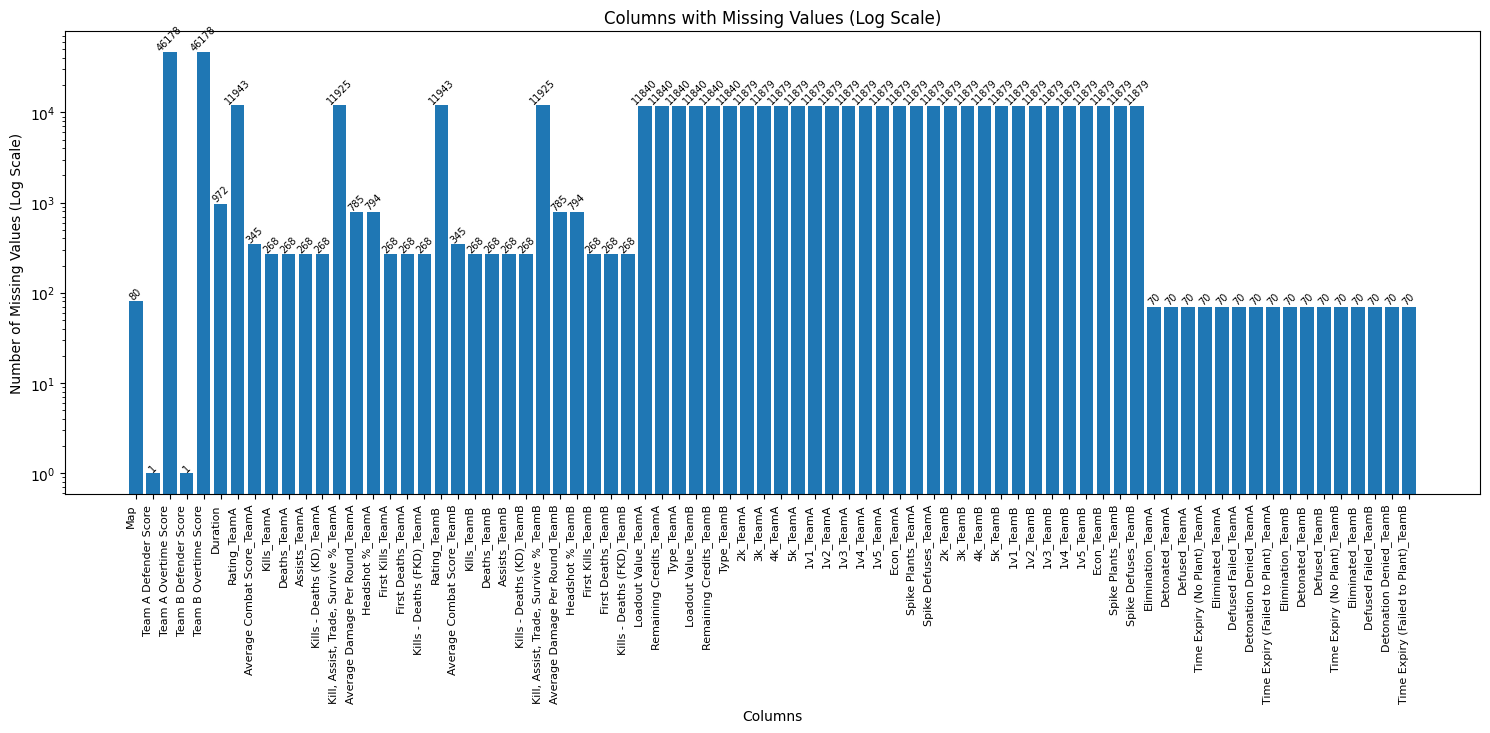

In [4]:
# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(15, 10))

# Use log scale for y-axis
plt.bar(range(len(missing_values)), missing_values.values)
plt.yscale('log')

plt.title('Columns with Missing Values (Log Scale)')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values (Log Scale)')

plt.xticks(range(len(missing_values)), missing_values.index, rotation=90, ha='right', fontsize=8)

# Add value labels on top of each bar
for i, v in enumerate(missing_values.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=7, rotation=45)

# Adjust layout and margins
plt.tight_layout()
plt.subplots_adjust(bottom=0.5)

plt.show()

Handling missing data by imputing strategies and by dropping rows with high percentage of missing values

In [5]:
# Drop these rows since the majority of their other columns are also missing
vct_all = vct_all.dropna(subset=["Map", "Team A Defender Score", "Team B Defender Score"])

# Fill with zeros since NaN values are due to no occurrences
cols_fill_zero = ["Team A Overtime Score", "Team B Overtime Score", "2k_TeamA", "3k_TeamA", "4k_TeamA", 
                  "5k_TeamA", "1v1_TeamA", "1v2_TeamA", "1v3_TeamA", "1v4_TeamA", "1v5_TeamA", "2k_TeamB", 
                  "3k_TeamB", "4k_TeamB", "5k_TeamB", "1v1_TeamB", "1v2_TeamB", "1v3_TeamB","1v4_TeamB", 
                  "1v5_TeamB", "Spike Plants_TeamA", "Spike Defuses_TeamA", "Spike Plants_TeamB",
                  "Spike Defuses_TeamB", "Elimination_TeamA", "Detonated_TeamA", "Defused_TeamA", 
                  "Time Expiry (No Plant)_TeamA", "Eliminated_TeamA","Defused Failed_TeamA",
                  "Detonation Denied_TeamA","Time Expiry (Failed to Plant)_TeamA", "Elimination_TeamB",
                  "Detonated_TeamB", "Defused_TeamB", "Time Expiry (No Plant)_TeamB","Eliminated_TeamB", 
                  "Defused Failed_TeamB", "Detonation Denied_TeamB","Time Expiry (Failed to Plant)_TeamB"]

vct_all[cols_fill_zero] = vct_all[cols_fill_zero].fillna(0)

In [6]:
# Split the data into 80% training and 20% testing
split_index = int(0.8 * len(vct_all))
train = vct_all.iloc[:split_index].copy()
test = vct_all.iloc[split_index:].copy()

In [7]:
# Fill with the most frequent value
cols_fill_mode = ["Duration", "Type_TeamA", "Type_TeamB"]

categorical_imp = SimpleImputer(strategy="most_frequent")
train.loc[:, cols_fill_mode] = categorical_imp.fit_transform(train[cols_fill_mode])
test.loc[:, cols_fill_mode] = categorical_imp.transform(test[cols_fill_mode])


# Fill with the mean
cols_fill_float_mean = ["Rating_TeamA", "Average Combat Score_TeamA", "Kill, Assist, Trade, Survive %_TeamA",
                        "Average Damage Per Round_TeamA", "Headshot %_TeamA", "Rating_TeamB", "Average Combat Score_TeamB", 
                        "Kill, Assist, Trade, Survive %_TeamB","Average Damage Per Round_TeamB", "Headshot %_TeamB",
                        "Loadout Value_TeamA", "Remaining Credits_TeamA", "Loadout Value_TeamB", "Remaining Credits_TeamB", 
                        "Econ_TeamA", "Econ_TeamB"]

cols_fill_int_mean = ["Kills_TeamA", "Deaths_TeamA", "Assists_TeamA", "Kills - Deaths (KD)_TeamA", "First Kills_TeamA", 
                      "First Deaths_TeamA", "Kills - Deaths (FKD)_TeamA", "Kills_TeamB","Deaths_TeamB", "Assists_TeamB",
                      "Kills - Deaths (KD)_TeamB", "First Kills_TeamB", "First Deaths_TeamB", "Kills - Deaths (FKD)_TeamB"]

mean_imp = SimpleImputer(strategy="mean")

# For float columns
train.loc[:, cols_fill_float_mean] = mean_imp.fit_transform(train[cols_fill_float_mean])
test.loc[:, cols_fill_float_mean] = mean_imp.transform(test[cols_fill_float_mean])

# For integer columns
train.loc[:, cols_fill_int_mean] = mean_imp.fit_transform(train[cols_fill_int_mean])
train.loc[:, cols_fill_int_mean] = train[cols_fill_int_mean].astype("int")

test.loc[:, cols_fill_int_mean] = mean_imp.transform(test[cols_fill_int_mean])
test.loc[:, cols_fill_int_mean] = test[cols_fill_int_mean].astype("int")

In [8]:
missing_values = train.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values")
else:
    print(missing_values[missing_values > 0])

No missing values


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40497 entries, 0 to 40560
Data columns (total 87 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Tournament                            40497 non-null  object 
 1   Stage                                 40497 non-null  object 
 2   Match Type                            40497 non-null  object 
 3   Match Name                            40497 non-null  object 
 4   Map                                   40497 non-null  object 
 5   Team A                                40497 non-null  object 
 6   Team A Score                          40497 non-null  int64  
 7   Team A Attacker Score                 40497 non-null  int64  
 8   Team A Defender Score                 40497 non-null  float64
 9   Team A Overtime Score                 40497 non-null  float64
 10  Team B                                40497 non-null  object 
 11  Team B Score        

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10125 entries, 40561 to 50703
Data columns (total 87 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Tournament                            10125 non-null  object 
 1   Stage                                 10125 non-null  object 
 2   Match Type                            10125 non-null  object 
 3   Match Name                            10125 non-null  object 
 4   Map                                   10125 non-null  object 
 5   Team A                                10125 non-null  object 
 6   Team A Score                          10125 non-null  int64  
 7   Team A Attacker Score                 10125 non-null  int64  
 8   Team A Defender Score                 10125 non-null  float64
 9   Team A Overtime Score                 10125 non-null  float64
 10  Team B                                10125 non-null  object 
 11  Team B Score    

# Converting columns to their appropriate data type

Convert specified columns to integers

In [11]:
convert_columns = ['Team A Overtime Score', 'Team B Overtime Score', 
                   'Team A Defender Score', 'Team B Defender Score']

train.loc[:, convert_columns] = train[convert_columns].astype('int')
test.loc[:, convert_columns] = test[convert_columns].astype('int')


Convert Duration column to minutes in float type

In [12]:
train.loc[:, 'Duration'] = pd.to_timedelta(
    train['Duration'].apply(lambda x: '00:' + x if len(x.split(':')) == 2 else x)
).dt.total_seconds() / 60

train['Duration'].head()

0    41.883333
1    41.883333
2    38.933333
3    38.933333
4    28.033333
Name: Duration, dtype: object

In [13]:
test.loc[:, 'Duration'] = pd.to_timedelta(
    test['Duration'].apply(lambda x: '00:' + x if len(x.split(':')) == 2 else x)
).dt.total_seconds() / 60

test['Duration'].head()

40561    43.333333
40562    46.366667
40563    46.366667
40564         47.7
40565         47.7
Name: Duration, dtype: object

Checking if changes were correctly applied

In [14]:
train.dtypes

Tournament                               object
Stage                                    object
Match Type                               object
Match Name                               object
Map                                      object
Team A                                   object
Team A Score                              int64
Team A Attacker Score                     int64
Team A Defender Score                   float64
Team A Overtime Score                   float64
Team B                                   object
Team B Score                              int64
Team B Attacker Score                     int64
Team B Defender Score                   float64
Team B Overtime Score                   float64
Duration                                 object
Rating_TeamA                            float64
Average Combat Score_TeamA              float64
Kills_TeamA                             float64
Deaths_TeamA                            float64
Assists_TeamA                           

# Feature engineering

Concatenate train and test sets to ensure rolling features and aggregated stats are computed with full historical data continuity. This prevents the test set from starting with a blank slate and allows it to benefit from the training set's prior match history. Re-split after feature creation.

In [15]:
# Track which rows are from the train and test sets
train.loc[:, "from_train"] = True
test.loc[:, "from_train"] = False

# Combine train and test sets to ensure continuity of stats
combined = pd.concat([train, test]).reset_index(drop=True)

# Compute specified stats from the last 5 games
def create_rolling_features(df, window=10):
    for team in ["TeamA", "TeamB"]:
        total_rounds = df["Team A Score"] + df["Team B Score"]

        # Compute KDA per team
        df[f"KDA_{team}"] = (df[f"Kills_{team}"] + df[f"Assists_{team}"]) / np.maximum(df[f"Deaths_{team}"], 1)

        # Round win %
        df[f"Round Win %_{team}"] = df[f"Team {team[-1]} Score"] / total_rounds

        # First blood %
        df[f"First Blood %_{team}"] = df[f"First Kills_{team}"] / total_rounds

        # Total clutches in a game
        df[f"Clutches_{team}"] = df[[f"1v{x}_{team}" for x in range(1, 6)]].sum(axis=1)

        # Attacker, Defender, and Overtime win rates
        opponent = "Team B" if team == "TeamA" else "Team A"
        df[f"Attacker Win %_{team}"] = df[f"Team {team[-1]} Attacker Score"] / np.maximum(df[f"Team {team[-1]} Attacker Score"] + df[f"{opponent} Defender Score"], 1)
        df[f"Defender Win %_{team}"] = df[f"Team {team[-1]} Defender Score"] / np.maximum(df[f"Team {team[-1]} Defender Score"] + df[f"{opponent} Attacker Score"], 1)
        df[f"Overtime Win %_{team}"] = df[f"Team {team[-1]} Overtime Score"] / np.maximum(df[f"Team {team[-1]} Overtime Score"] + df[f"{opponent} Overtime Score"], 1)
        
        # List of columns to apply rolling average on
        cols = ["Rating", "Average Combat Score", "Average Damage Per Round", "KDA", "Kill, Assist, Trade, Survive %",
                "Round Win %", "Attacker Win %", "Defender Win %", "Overtime Win %", "First Blood %", "Headshot %", 
                "Clutches", "Econ"]

        # Group by team to avoid mixing data between teams
        for col in cols:
            df[f"{col}_RollAvg_{team}"] = df.groupby(f"Team {team[-1]}")[f"{col}_{team}"] \
                                            .transform(lambda x: x.shift(1)
                                                                  .rolling(window=window, min_periods=1)
                                                                  .mean()
                                                                  .fillna(0))

            # Identify if this is the first appearance of the team, and overwrite the result with 0s if so
            first_match = df.groupby(f"Team {team[-1]}").cumcount() == 0
            df.loc[first_match, f"{col}_RollAvg_{team}"] = 0
        
        # Recent win rate
        df[f"Recent Win %_{team}"] = df.groupby(f"Team {team[-1]}")["Winner"] \
                                       .transform(lambda x: x.shift(1)
                                                             .rolling(window=window, min_periods=1)
                                                             .mean()
                                                             .fillna(0))
    return df

# Computes historical win rate excluding the current match (row)
def past_win_rate(group):
    cumsum = group.cumsum()
    total = np.arange(1, len(group) + 1)
    return (cumsum - group) / (total - 1)

# Create Map and H2H win rates for each team
def create_win_rate_features(df, initial_rate=0):
    for team in ["Team A", "Team B"]:
        outcome = 1 if team == "Team A" else 0

        # Tournament Win %
        df[f"{team} Tournament Win %"] = df.groupby([team, "Tournament"])["Winner"].transform(lambda x: past_win_rate(x == outcome))

        # Map Win %
        df[f"{team} Map Win %"] = df.groupby([team, "Map"])["Winner"].transform(lambda x: past_win_rate(x == outcome))
        
        # H2H Win %
        df[f"{team} H2H Win %"] = df.groupby(["Team A", "Team B"])["Winner"].transform(lambda x: past_win_rate(x == outcome))
    
    # Replace NaN (for first games) with initial rate
    for team in ["Team A", "Team B"]:
        df[f"{team} Tournament Win %"] = df[f"{team} Tournament Win %"].fillna(initial_rate)
        df[f"{team} Map Win %"] = df[f"{team} Map Win %"].fillna(initial_rate)
        df[f"{team} H2H Win %"] = df[f"{team} H2H Win %"].fillna(initial_rate)

    return df


# Apply feature engineering functions
combined = create_rolling_features(combined)
combined = create_win_rate_features(combined)

# Split back into train and test sets
train = combined[combined["from_train"]].copy()
test = combined[~combined["from_train"]].copy()

# Drop the temporary column
train = train.drop(columns=["from_train"])
test = test.drop(columns=["from_train"])

# Drop rows with missing values since all their features are missing
train = train.dropna()
test = test.dropna()

In [16]:
train.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,Winner,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %
0,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Leviatán,7,6,1.0,0.0,Furious Gaming,13,7,6.0,0.0,41.883333,0.990122,186.0,60.0,76.0,22.0,-16.0,0.699855,119.6,0.250,10.0,10.0,0.0,0.990134,218.4,76.0,60.0,25.0,16.0,0.699858,132.8,0.190,10.0,10.0,0.0,17455.584114,8510.17329,Full buy: 20k+,17455.711283,8510.381277,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.517956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.51867,0.0,0.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,0,1.078947,0.350000,0.500000,0.0,0.500000,0.125000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,1.683333,0.650000,0.500000,0.0,0.875000,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Furious Gaming,13,7,6.0,0.0,Leviatán,7,6,1.0,0.0,41.883333,0.990122,218.4,76.0,60.0,25.0,16.0,0.699855,132.8,0.190,10.0,10.0,0.0,0.990134,186.0,60.0,76.0,22.0,-16.0,0.699858,119.6,0.250,10.0,10.0,0.0,17455.584114,8510.17329,Full buy: 20k+,17455.711283,8510.381277,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.517956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.51867,0.0,0.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0

In [17]:
test.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,Winner,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %
40497,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 7,BLEED vs Galaxy Esports,Icebox,Galaxy Esports,13,4,9.0,0.0,BLEED,7,3,4.0,0.0,43.333333,1.164,222.2,82.0,60.0,18.0,22.0,0.730,145.6,0.226,11.0,9.0,2.0,0.806,179.2,60.0,82.0,24.0,-22.0,0.630,119.2,0.240,9.0,11.0,-2.0,19605.000000,10715.000000,Full buy: 20k+,15860.000000,4590.000000,Semi-buy: 10-20k,14.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,67.2,5.0,2.0,10.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,46.2,5.0,0.0,10.0,1.0,2.0,0.0,4.0,2.0,0.0,1.0,4.0,2.0,0.0,1.0,10.0,1.0,2.0,0.0,1,1.666667,0.650000,0.550000,1.0,0.500000,0.750000,0.0,0.9240,194.40,125.38,1.301095,0.7012,0.440863,0.450000,0.463308,0.000,0.513037,0.2098,1.6,50.04,0.4,1.024390,0.350000,0.450000,3.0,0.250000,0.500000,0.0,0.9710,197.86,129.62,1.379461,0.7036,0.489425,0.562500,0.436111,0.025,0.475159,0.2452,1.8,52.34,0.6,0.500000,0.200000,0.5,0.571429,0.666667,0.5
40498,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 8,BLEED vs KPMOONIIBLM9,Ascent,BLEED,11,5,6.0,0.0,KPMOONIIBLM9,13,6,7.0,0.0,46.366667,0.920,196.2,80.0,86.0,35.0,-6.0,0.684,131.0,0.230,9.0,15.0,-6.0,1.128,205.8,86.0,81.0,43.0,5.0,0.726,143.2,0.290,15.0,9.0,6.0,17050.000000,8370.833333,Full buy: 20k+,18195.833333,11104.166667,Full buy: 20k+,12.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,54.2,6.0,2.0,17.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,59.2,7.0,3.0,8.0,1.0,2.0,0.0,10.0,0.0,3.

# Extract features and target

In [18]:
y_train = train["Winner"]
X_train = train.drop("Winner", axis=1)

y_test = test["Winner"]
X_test = test.drop("Winner", axis=1)

# Encoding categorical variables

In [19]:
# Identify categorical columns and their cardinality
categorical_columns = train.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    print(f"{col}: {train[col].nunique()}")

Tournament: 167
Stage: 67
Match Type: 213
Match Name: 8881
Map: 7
Team A: 3714
Team B: 3714
Duration: 2904
Type_TeamA: 4
Type_TeamB: 4


One-hot encoding for Map column

In [20]:
maps = [["Abyss", "Ascent", "Bind", "Breeze", "Fracture", "Haven", "Icebox", "Lotus", "Pearl", "Split", "Sunset"]]

OH_encoder = OneHotEncoder(categories=maps, handle_unknown="ignore", sparse_output=False)

map_train = OH_encoder.fit_transform(X_train[["Map"]])
map_test = OH_encoder.transform(X_test[["Map"]])

map_names = OH_encoder.get_feature_names_out(["Map"])

map_train_df = pd.DataFrame(map_train, columns=map_names, index=X_train.index)
map_test_df = pd.DataFrame(map_test, columns=map_names, index=X_test.index)

X_train = pd.concat([X_train, map_train_df], axis=1)
X_test = pd.concat([X_test, map_test_df], axis=1)

In [21]:
X_train.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset
0,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Leviatán,7,6,1.0,0.0,Furious Gaming,13,7,6.0,0.0,41.883333,0.990122,186.0,60.0,76.0,22.0,-16.0,0.699855,119.6,0.250,10.0,10.0,0.0,0.990134,218.4,76.0,60.0,25.0,16.0,0.699858,132.8,0.190,10.0,10.0,0.0,17455.584114,8510.17329,Full buy: 20k+,17455.711283,8510.381277,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.517956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.51867,0.0,0.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,1.078947,0.350000,0.500000,0.0,0.500000,0.125000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,1.683333,0.650000,0.500000,0.0,0.875000,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Furious Gaming,13,7,6.0,0.0,Leviatán,7,6,1.0,0.0,41.883333,0.990122,218.4,76.0,60.0,25.0,16.0,0.699855,132.8,0.190,10.0,10.0,0.0,0.990134,186.0,60.0,76.0,22.0,-16.0,0.699858,119.6,0.250,10.0,10.0,0.0,17455.584114,8510.17329,Full buy: 20k+,17455.711283,8510.38127

Target encoding for team names (Team A, Team B)

In [22]:
team_encoder = TargetEncoder(target_type="binary", smooth="auto", cv=5, shuffle=False)

team_cols = ["Team A", "Team B"]

# Apply target encoding to team columns
team_cols_train = pd.DataFrame(team_encoder.fit_transform(X_train[team_cols], y_train), 
                               columns=[f"{col}_Encoded" for col in team_cols], 
                               index=X_train.index)
team_cols_test = pd.DataFrame(team_encoder.transform(X_test[team_cols]), 
                              columns=[f"{col}_Encoded" for col in team_cols], 
                              index=X_test.index)

# Add encoded columns as new columns to the train and test sets
X_train = pd.concat([X_train, team_cols_train], axis=1)
X_test = pd.concat([X_test, team_cols_test], axis=1)


In [23]:
X_train.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded
0,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Leviatán,7,6,1.0,0.0,Furious Gaming,13,7,6.0,0.0,41.883333,0.990122,186.0,60.0,76.0,22.0,-16.0,0.699855,119.6,0.250,10.0,10.0,0.0,0.990134,218.4,76.0,60.0,25.0,16.0,0.699858,132.8,0.190,10.0,10.0,0.0,17455.584114,8510.17329,Full buy: 20k+,17455.711283,8510.381277,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.517956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.51867,0.0,0.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,1.078947,0.350000,0.500000,0.0,0.500000,0.125000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,1.683333,0.650000,0.500000,0.0,0.875000,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000,0.000,0.0,0.0,0.00,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.559545,0.534095
1,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Furious Gaming,13,7,6.0,0.0,Leviatán,7,6,1.0,0.0,41.883333,0.990122,218.4,76.0,60.0,25.0,16.0,0.699855,132.8,0.190,10.0,10.0,0.0,0.990134,186.0,60.0,76.0,22.0,-16.0,0.699858,119.6,0.250,10.0,10.0,0.0,17455.584114,8

In [24]:
X_test.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Round Win %_TeamA,First Blood %_TeamA,Clutches_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Round Win %_RollAvg_TeamA,Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Round Win %_TeamB,First Blood %_TeamB,Clutches_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Round Win %_RollAvg_TeamB,Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Tournament Win %,Team A Map Win %,Team A H2H Win %,Team B Tournament Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded
40497,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 7,BLEED vs Galaxy Esports,Icebox,Galaxy Esports,13,4,9.0,0.0,BLEED,7,3,4.0,0.0,43.333333,1.164,222.2,82.0,60.0,18.0,22.0,0.730,145.6,0.226,11.0,9.0,2.0,0.806,179.2,60.0,82.0,24.0,-22.0,0.630,119.2,0.240,9.0,11.0,-2.0,19605.000000,10715.000000,Full buy: 20k+,15860.000000,4590.000000,Semi-buy: 10-20k,14.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,67.2,5.0,2.0,10.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,46.2,5.0,0.0,10.0,1.0,2.0,0.0,4.0,2.0,0.0,1.0,4.0,2.0,0.0,1.0,10.0,1.0,2.0,0.0,1.666667,0.650000,0.550000,1.0,0.500000,0.750000,0.0,0.9240,194.40,125.38,1.301095,0.7012,0.440863,0.450000,0.463308,0.000,0.513037,0.2098,1.6,50.04,0.4,1.024390,0.350000,0.450000,3.0,0.250000,0.500000,0.0,0.9710,197.86,129.62,1.379461,0.7036,0.489425,0.562500,0.436111,0.025,0.475159,0.2452,1.8,52.34,0.6,0.500000,0.200000,0.5,0.571429,0.666667,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.447334,0.414839
40498,Champions Tour Malaysia & Singapore Stage 2: C...,Group Stage,Day 8,BLEED vs KPMOONIIBLM9,Ascent,BLEED,11,5,6.0,0.0,KPMOONIIBLM9,13,6,7.0,0.0,46.366667,0.920,196.2,80.0,86.0,35.0,-6.0,0.684,131.0,0.230,9.0,15.0,-6.0,1.128,205.8,86.0,81.0,43.0,5.0,0.726,143.2,0.290,15.0,9.0,6.0,17050.000

# Saving cleaned and preprocessed dataset

In [25]:
# Recombine the preprocessed features and target
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.to_csv("vct_data/train_preprocessed.csv", index=False)
test.to_csv("vct_data/test_preprocessed.csv", index=False)